<a href="https://colab.research.google.com/github/itssyoma/BigDataBaratov/blob/main/%D0%9B%D0%A04_%D0%A0%D0%B5%D0%BA%D0%BE%D0%BC%D0%B5%D0%BD%D0%B4%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №4
# Тема: Рекомендательные системы <br>
**Дисциплина:** «Обработка и анализ больших данных» <br>
**Выполнил:** Студент группы ПИЖ-б-о-22-1, направление подготовки: 09.03.04 «Программная инженерия»<br>
Баратов Семен Григорьевич

# Постановка задачи


**Цель работы:** применение идей коллаборативной фильтрации и фильтрации, основанной на контенте, для формирования рекомендаций фильмов пользователям.

**Краткое описание:** в лабораторной работе необходимо выполнить 3 задания на исследование данных о фильмах с сайта [MovieLens](http://movielens.org) и применение двух подходов к построению рекомендаций фильмов – на основе предпочтений похожих пользователей и на основе предпочтений пользователя, для которого генерируется рекомендация.

#  Данные


Набор данных `ml-25m` включает в себя описание 5-звёздного рейтинга фильмов с сайта [MovieLens](http://movielens.org) – одного из старейших сервисов по рекомендации фильмов. Набор данных содержит 25 000 095 оценок и 1 093 360 применений тегов к 62 423 фильмам. Эти данные были созданы 162 541 пользователями в период с 9 января 1995 года по 21 ноября 2019 года – именно в этот день был сгенерирован датасет.

Пользователи были выбраны случайным образом при условии, что пользователь оценил как минимум 20 фильмов. Демографическая информация в набор данных не включена. Каждый пользователь представлен только `id`.

В папке [Data/lab4](https://drive.google.com/drive/folders/1tHu5zzSTF_ZB9OfeaWvM4cWwGM2q99b8?usp=sharing) расположено несколько таблиц с характеристиками фильмов. Также эти данные доступны для скачивания [по ссылке](https://grouplens.org/datasets/movielens/25m/) (как и другие наборы данных от GroupLens). Все задания лабораторной работы необходимо выполнять по этим данным.

Данные включают в себя файлы: `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` и `tags.csv`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
sns.set_context("notebook")

In [ ]:
# загрузка данных из папки Data/lab4
!gdown 1KjMiVB0j5B6yF5vnwLGYcThQaPkPx0tH
!gdown 1uWeLWEkkd_GX8HoMVxpRXdSg7BgfSCdR
!gdown 1xcv1ZY8bwi-AkqZGs5_f8kIPXWHa8Q1W
!gdown 1ahac-9nULw9C1aS7pxh05RTtSlbxJxlS
!gdown 1bYRHTZJ1eZ5T2IugHxsDwrc4xuaWB-A9
!gdown 1XaxxydOXE5zdhhehv-Wig99CuJmg0B_w

Downloading...
From (original): https://drive.google.com/uc?id=1KjMiVB0j5B6yF5vnwLGYcThQaPkPx0tH
From (redirected): https://drive.google.com/uc?id=1KjMiVB0j5B6yF5vnwLGYcThQaPkPx0tH&confirm=t&uuid=12b41130-74cf-451e-a927-fb2805d40da1
To: /content/genome-scores.csv
100% 435M/435M [00:02<00:00, 171MB/s]
Downloading...
From: https://drive.google.com/uc?id=1uWeLWEkkd_GX8HoMVxpRXdSg7BgfSCdR
To: /content/genome-tags.csv
100% 18.1k/18.1k [00:00<00:00, 69.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xcv1ZY8bwi-AkqZGs5_f8kIPXWHa8Q1W
To: /content/links.csv
100% 1.37M/1.37M [00:00<00:00, 183MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ahac-9nULw9C1aS7pxh05RTtSlbxJxlS
To: /content/movies.csv
100% 3.04M/3.04M [00:00<00:00, 202MB/s]
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

Y

### Таблица ```tags.csv```
##### **Описание**
Таблица содержит все теги фильмов. Теги - это сгенерированные пользователями метаданные о фильмах. Каждый тег обычно представляет собой слово или коротку фразу. Значение, ценность и цель каждого тега определяется каждым пользователем.


##### **Формат данных**


```
userId,movieId,tag,timestamp
3,260,classic,1439472355
3,260,sci-fi,1439472256
4,1732,dark,comedy,1573943598
...
```
##### **Описание полей**

 - ``` userId``` — идентификатор пользователя;
 - ``` movieId``` — идентификатор фильма;
 - ``` tag``` — название тега;
 - ``` timestamp``` — количество секунд, прошедших с 1 января 1970.


In [ ]:
# создание датафрейма тегов
tag=pd.read_csv('tags.csv')
tag.sample(3)

,userId,movieId,tag,timestamp
184658,6550,151565,black cat,1527134943
361769,29799,555,Quentin Tarantino,1420578973
1013515,149463,380,Jamie Lee Curtis,1249679230


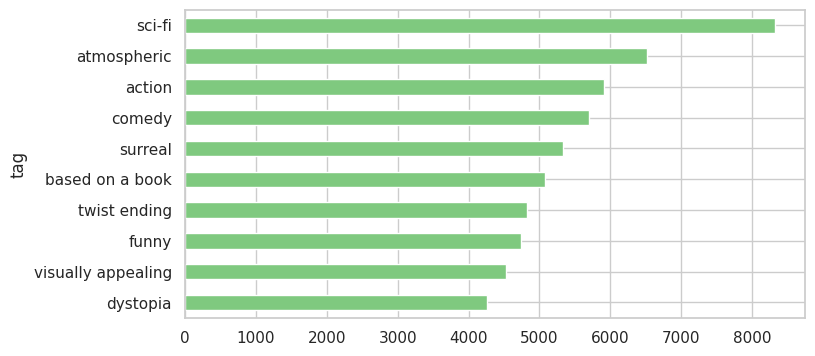

In [ ]:
tag_counts = tag['tag'].value_counts()
tag_counts[:10].sort_values().plot(kind='barh', figsize=(8,4), colormap="Accent");

### Таблица ```ratings.csv```
##### **Описание**
В таблице представлены оценки пользователей за фильмы. Рейтинги предствляют собой школу из 5 звезд с использованием половинки звезды (от 0.5 звёзд до 5.0 звёзд).

##### **Формат данных**

```
userId,movieId,rating,timestamp
1,296,5.0,1147880044
1,306,3.5,1147868817
1,307,5.0,1147868828
...
```
##### **Описание полей**

 - ``` userId``` — идентификатор пользователя;
 - ``` movieId``` — идентификатор фильма;
 - ``` rating``` — оценка, которую пользователь поставил фильму;
 - ``` timestamp``` — количество секунд, прошедших с 1 января 1970..

Строки упорядочены по `userId`, а затем по `movieId`.

In [ ]:
# загрузка данных о рейтингах
rating=pd.read_csv('ratings.csv', on_bad_lines='skip')
rating.sample(3)

,userId,movieId,rating,timestamp
14635480,93960,21.0,3.0,8.351900e+08
24590620,158983,190089.0,4.0,1.531348e+09
5877396,37268,117176.0,3.0,1.569037e+09


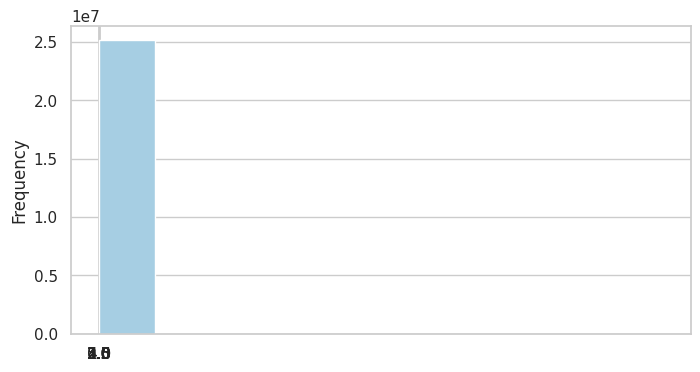

In [ ]:
# гистограмма рейтингов
rating["rating"].plot(kind='hist', figsize=(8,4), colormap="Paired", xticks=np.arange(0.5,5.5,0.5));

### Таблица ```movies.csv```
##### **Описание**
Таблица содержит информацию о фильмах. Каждая строка представляет информацию об одном фильме. Названия фильмов вводились вручную или были импортированы с сайта <https://www.themoviedb.org/>.


##### **Формат данных**

```
movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
...
```
##### **Описание полей**

 - ``` movieId``` — идентификатор фильма;
 - ``` title``` — название фильма и год выпуска в скобках после названия;
 - ``` genres``` — список жанров фильма, все жанры записываются в одном поле через разделитель `|`.


Допустимые жанры | $ $
--- | ---
1. Action | 11. Horror
2. Adventure | 12. Musical
3. Animation | 13. Mystery
4. Children's | 14. Romance
5. Comedy | 15. Sci-Fi
6. Crime | 16. Thriller
7. Documentary | 17. War
8. Drama | 18. Western
9. Fantasy | 19. (no genres listed)
10. Film-Noir |  











### Таблица ```genome-tags.csv```
##### **Описание**

[genome-paper]: http://files.grouplens.org/papers/tag_genome.pdf

Tag genome – это структура данных, которая описывает релевантность тегов по отношению к фильму. Заданы 1128 тэгов, и по каждому фильму указаны значения релевантности для каждого тега.

Описание [в статье][genome-paper]. Tag genome был рассчитан с помощью алгоритма на основе пользовательского контента, включая теги, рейтинги и текстовые описания.

Таблица содержит описания тегов.


##### **Формат данных**

```
tagId,tag
2,007 (series)
4,1920s
11,3d
22,adapted from:book
...
```
##### **Описание полей**

 - ``` tagId``` — идентификатор тега, значения сгенерированы в тот момент, когда экспортировался весь набор данных, так что могут быть не такими, как в других версиях датасетов от MovieLens (например, 1М и 20M).;
 - ``` tag``` — название тега.


### Таблица ```genome-scores.csv```
##### **Описание**
Таблица содержит релевантность тегов по отношению к фильмам.

##### **Формат данных**

```
movieId,tagId,relevance
1,3,0.0625
1,5,0.14075
1,8,0.20375
...
```
##### **Описание полей**

 - ``` movieId``` — идентификатор фильма;
 - ``` tagId``` — идентификатор тега;
 - ``` relevance``` — релевантность тега фильму.


In [ ]:
# загрузка данных о фильмах и tag genome
movies = pd.read_csv("movies.csv")
genome_scores = pd.read_csv('genome-scores.csv')
genome_tag = pd.read_csv('genome-tags.csv')

In [ ]:
# релевантность каждого тега фильму Demolition Man (1993)
genome_scores[genome_scores.movieId == 442]

,movieId,tagId,relevance
474888,442,1,0.04525
474889,442,2,0.04575
474890,442,3,0.03475
474891,442,4,0.04700
474892,442,5,0.06375
...,...,...,...
476011,442,1124,0.04400
476012,442,1125,0.03250
476013,442,1126,0.00800
476014,442,1127,0.11775


In [ ]:
# выведем 5 фильмов с самой высокой релевантностью тега "dragon"
genome_tag[genome_tag.tag == 'dragon']

,tagId,tag
320,321,dragon


In [ ]:
top5_dragon_genom = genome_scores.query("tagId == 321").nlargest(5, "relevance")
movies[movies.movieId.isin(top5_dragon_genom.movieId)]

,movieId,title,genres
642,653,Dragonheart (1996),Action|Adventure|Fantasy
4933,5039,Dragonslayer (1981),Action|Adventure|Fantasy
14477,76093,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
20603,106489,"Hobbit: The Desolation of Smaug, The (2013)",Adventure|Fantasy|IMAX
21757,112175,How to Train Your Dragon 2 (2014),Action|Adventure|Animation


### Таблица ```links.csv```
##### **Описание**
Таблица содержит идентификаторы фильмов с других ресурсов. В каждой строке находятся ссылки на один фильм.

##### **Формат данных**

```
movieId,imdbId,tmdbId
1,114709,862
2,113497,8844
3,113228,15602
...
```
##### **Описание полей**

 - ``` movieId``` — идентификатор фильма на <https://movielens.org>. Например, фильм "Toy Story" имеет ссылку <https://movielens.org/movies/1>;
 - ``` imdbId``` — идентификатор фильма на <http://www.imdb.com>. Например, фильм Toy Story имеет ссылку <http://www.imdb.com/title/tt0114709/>;
 - ``` tmdbId``` — идентификатор фильма на <https://www.themoviedb.org>. Например, фильм Toy Story имеет ссылку <https://www.themoviedb.org/movie/862>.


# Понимание данных

В таблице `movies.csv` представление жанров не очень хорошее: не очень понятно, что с ними можно делать. Очень часто для подобных данных используется следующий подход: под каждый жанр создается новый столбец, в соответствующем жанру столбце у фильма записывается 1, если в перечне был такой жанр, и 0 – если не было. Этот подход чем-то похож на one-hot encoding.

Вторая проблема с данными – наличие в столбце `title` года выпуска фильма. Лучше всего под год выпуска выделить отдельный столбец.

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# объединим таблицы с описаниями фильмов и их рейтингами в одну
data = pd.merge(movies,rating)

# первые 5 строк объединенной таблицы
display(data.head())

# 5 случайных строк из объединенной таблица
data.sample(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1.141416e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1.439472e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1.573944e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,8.586259e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,8.904925e+08


,movieId,title,genres,userId,rating,timestamp
19335664,27773,Old Boy (2003),Mystery|Thriller,49809,4.5,1.252260e+09
20934821,54503,Superbad (2007),Comedy,77896,0.5,1.509657e+09
782512,95,Broken Arrow (1996),Action|Adventure|Thriller,50910,3.0,8.303783e+08
7185194,1261,Evil Dead II (Dead by Dawn) (1987),Action|Comedy|Fantasy|Horror,104222,4.0,1.388290e+09
24147245,118702,Unbroken (2014),Drama|War,147378,4.0,1.451104e+09


In [ ]:
# в таблице number_rating будет храниться общее количество оценок фильму
number_rating = data.groupby('title')['rating'].count().rename("rated_by_users").reset_index()
number_rating.head()

,title,rated_by_users
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",1
1,"""Great Performances"" Cats (1998)",182
2,#1 Cheerleader Camp (2010),9
3,#Captured (2017),2
4,#Female Pleasure (2018),3


In [ ]:
# т.к. обработка всей таблицы с рейтингами фильмов от пользователей
# перегружает оперативную память, для примера возьмем случайные 10К строк из нее

data_train = data.sample(10000)
data_train.head()

,movieId,title,genres,userId,rating,timestamp
3356509,500,Mrs. Doubtfire (1993),Comedy|Drama,7577,4.0,1.160083e+09
6960191,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller,105271,4.0,9.747480e+08
8959444,1721,Titanic (1997),Drama|Romance,15987,2.5,1.085337e+09
16726518,5464,Road to Perdition (2002),Crime|Drama,147627,4.0,1.445548e+09
6181271,1190,Tie Me Up! Tie Me Down! (¡Átame!) (1990),Crime|Drama|Romance,14124,4.0,8.779963e+08


In [ ]:
# составим сводную таблицу рейтингов, который каждый пользователь ставил каждому фильму
movie_pivot = data_train.pivot_table(index=["userId"],
                                     columns=["title"],
                                     values="rating")
movie_pivot.head().T

userId,12,23,41,59,72
title,,,,,
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN
*batteries not included (1987),NaN,NaN,NaN,NaN,NaN
10 Cloverfield Lane (2016),NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
Zootopia (2016),NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN
iBoy (2017),NaN,NaN,NaN,NaN,NaN


Матрица предпочтений состоит практически из одних нулей.

В такой матрице маловероятно найти хоть что-то. Например, поищем похожий фильм.

In [ ]:
watched_movie = movie_pivot['10 Things I Hate About You (1999)']

similar_movies = movie_pivot.corrwith(watched_movie)
similar_movies = similar_movies.sort_values(ascending=False)
similar_movies.head()

,0
title,
10 Things I Hate About You (1999),1.0
"'burbs, The (1989)",NaN
(500) Days of Summer (2009),NaN
*batteries not included (1987),NaN
10 Cloverfield Lane (2016),NaN


Судя по результату, фильм похож только сам на себя.

# Практические задания

## Задание 1

Выход из этой ситуации с неудачным поиском похожих фильмов такой.

Будем делать рекомендации не всем и сразу, а конкретному пользователю. Формировать `movie_pivot` будем только для этого конкретного пользователя.

1. Возьмём все оценки, которые поставил пользователь $U$
2. По фильмам $M_U$, которые он оценил, получим всех пользователей, которые ставили этим фильмам оценки
3. Скорее всего, на этом этапе список получится большим (для случайного пользователя может получиться около 2 миллионов строк). Например, оставить только пользователей, у которых много общих фильмов.
4. Для каждого пользователя посчитаем похожесть (например, корреляцию).
5. Отсортируем пользователей по похожести.
6. Оставим только $k$ самых похожих пользователей.

### Пример решения

Выбираем случайного пользователя.

In [ ]:
all_users = rating['userId'].value_counts()
user = all_users.sample(1).index
user

Index([151337], dtype='int64', name='userId')

Получаем фильмы, которые пользователь посмотрел.

In [ ]:
user_movies = data[data.userId == user[0]]
user_movies = user_movies.drop(['genres', 'timestamp', 'userId'], axis = 1)
user_movies.head()

,movieId,title,rating
53637,1,Toy Story (1995),4.0
80271,2,Jumanji (1995),2.5
273339,19,Ace Ventura: When Nature Calls (1995),3.0
340779,25,Leaving Las Vegas (1995),4.5
357045,29,"City of Lost Children, The (Cité des enfants p...",5.0


Теперь найдем пользователей, которые смотрели эти фильмы.

In [ ]:
new_data = data[data.movieId.isin(user_movies.movieId)]
new_data = new_data.drop(['genres', 'timestamp'], axis = 1)
new_data.sample(10)

,movieId,title,userId,rating
18864112,8636,Spider-Man 2 (2004),159515,4.0
10941611,2393,Star Trek: Insurrection (1998),97748,3.5
2197472,318,"Shawshank Redemption, The (1994)",105962,3.5
8359781,1556,Speed 2: Cruise Control (1997),55609,2.0
16201455,4995,"Beautiful Mind, A (2001)",7764,4.0
12783641,2997,Being John Malkovich (1999),121982,4.0
8718429,1653,Gattaca (1997),5606,2.0
8681952,1641,"Full Monty, The (1997)",90064,2.0
23231849,96079,Skyfall (2012),28088,4.5
3614379,539,Sleepless in Seattle (1993),80617,3.0


Как по `ID` пользователя получить список его фильмов:

In [ ]:
users_group = new_data.groupby(['userId'])
users_group.get_group(user[0]).head()

,movieId,title,userId,rating
53637,1,Toy Story (1995),151337,4.0
80271,2,Jumanji (1995),151337,2.5
273339,19,Ace Ventura: When Nature Calls (1995),151337,3.0
340779,25,Leaving Las Vegas (1995),151337,4.5
357045,29,"City of Lost Children, The (Cité des enfants p...",151337,5.0


In [ ]:
user[0]

np.int64(151337)

In [ ]:
# выведем фильмы трех пользователей, оценивших больше всего фильмов в выборке
sorted_users_group = sorted(users_group,  key=lambda x: len(x[1]), reverse=True)
for user_movies_group in sorted_users_group[:3]:
  display(user_movies_group[1])

,movieId,title,userId,rating
104,1,Toy Story (1995),3150,3.0
1357,1,Toy Story (1995),3150,3.0
57630,2,Jumanji (1995),3150,4.0
58125,2,Jumanji (1995),3150,4.0
253187,19,Ace Ventura: When Nature Calls (1995),3150,3.0
...,...,...,...,...
24234444,122904,Deadpool (2016),3150,3.5
24383317,134130,The Martian (2015),3150,3.5
24383660,134130,The Martian (2015),3150,3.5
24626216,152081,Zootopia (2016),3150,3.5


,movieId,title,userId,rating
370,1,Toy Story (1995),3624,5.0
1511,1,Toy Story (1995),3624,5.0
57732,2,Jumanji (1995),3624,2.5
58187,2,Jumanji (1995),3624,2.5
349301,29,"City of Lost Children, The (Cité des enfants p...",3624,3.5
...,...,...,...,...
24267962,122918,Guardians of the Galaxy 2 (2017),3624,3.5
24383392,134130,The Martian (2015),3624,4.0
24383704,134130,The Martian (2015),3624,4.0
24626260,152081,Zootopia (2016),3624,3.0


,movieId,title,userId,rating
329,1,Toy Story (1995),3517,4.0
1470,1,Toy Story (1995),3517,4.0
57722,2,Jumanji (1995),3517,3.0
58177,2,Jumanji (1995),3517,3.0
253283,19,Ace Ventura: When Nature Calls (1995),3517,2.5
...,...,...,...,...
21092320,56171,"Golden Compass, The (2007)",3517,5.0
21247576,58559,"Dark Knight, The (2008)",3517,4.0
21248350,58559,"Dark Knight, The (2008)",3517,4.0
21366875,59615,Indiana Jones and the Kingdom of the Crystal S...,3517,3.0


Выведем `ID` пользователя, у которого больше всего похожих фильмов.

In [ ]:
similar_movies_user = sorted_users_group[1][0] # скорее всего, в sorted_users_group[0][0] сидит сам пользователь

In [ ]:
person2 = users_group.get_group(similar_movies_user).sort_values(by='movieId')

Получим список одинаковых фильмов для двух пользователей с оценками.

In [ ]:
temp = user_movies[user_movies['movieId'].isin(users_group.get_group(similar_movies_user)['movieId'])]
person1 = temp.sort_values(by='movieId')

Посчитаем коэффициент корреляции Пирсона для этих двух пользователей


In [ ]:
from scipy.stats import pearsonr

# Ensure both person1 and person2 contain unique ratings for common movies
# and are aligned correctly.

# Get the list of common movie IDs from person1 (which already represents common movies rated by target user)
common_movie_ids = person1['movieId'].unique()

# Filter person1 and person2 to include only these common movies and ensure no duplicates
# We take the mean rating if there are multiple for some reason, though ideally there shouldn't be for (user, movie) pairs.
person1_filtered = person1[person1['movieId'].isin(common_movie_ids)].groupby('movieId')['rating'].mean().reset_index()
person2_filtered = person2[person2['movieId'].isin(common_movie_ids)].groupby('movieId')['rating'].mean().reset_index()

# Merge them to ensure perfect alignment by movieId
common_ratings_aligned = pd.merge(
    person1_filtered,
    person2_filtered,
    on='movieId',
    how='inner',
    suffixes=('_person1', '_person2')
)

# Now, the rating series should be of the same length and correctly aligned
rating1 = common_ratings_aligned['rating_person1']
rating2 = common_ratings_aligned['rating_person2']

# Check if there are enough common movies to compute correlation
if len(rating1) > 1 and len(rating2) > 1: # pearsonr requires at least 2 data points
    correlation = pearsonr(rating1, rating2)[0]
    print(correlation)
else:
    print(0.0) # No meaningful correlation if too few common items

0.2667295413608498


**Дальше нужно дописать самостоятельно.** Нужно пройтись по всем пользователям и отсортировать их по похожести и оставить $k$ самых похожих.

> Далее в коде приведены примеры расчетов для случайных пользователей. Их нужно заменить своими.

In [ ]:
users = list(users_group.groups.keys())
# Убираем целевого пользователя из списка
users = [u for u in users if u != user[0]]
# Ограничиваем количество пользователей для скорости вычислений
users = users[:100]  # можно увеличить до 500 или 1000 при необходимости

pearsonCorDict = {}

for u in users:
    try:
        # Получаем фильмы пользователя u
        person2 = users_group.get_group(u).sort_values(by='movieId')

        # Находим общие фильмы между целевым пользователем и пользователем u
        common_movies = user_movies[user_movies['movieId'].isin(person2['movieId'])]

        # Если общих фильмов меньше 3, пропускаем (слишком мало данных для корреляции)
        if len(common_movies) < 3:
            continue

        # Сортируем общие фильмы по movieId для корректного сопоставления
        person1_common = common_movies.sort_values(by='movieId')
        person2_common = person2[person2['movieId'].isin(common_movies['movieId'])].sort_values(by='movieId')

        # Убеждаемся, что порядок фильмов одинаковый
        if len(person1_common) == len(person2_common):
            # Вычисляем корреляцию Пирсона
            correlation, _ = pearsonr(person1_common['rating'].values, person2_common['rating'].values)

            # Сохраняем только значимые корреляции (не NaN и не слишком низкие)
            if not np.isnan(correlation) and abs(correlation) > 0.1:
                pearsonCorDict[u] = correlation
    except Exception as e:
        # Пропускаем пользователей, для которых возникают ошибки
        continue


In [ ]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.405597,1
1,0.331065,3
2,0.377637,4
3,0.108188,5
4,0.382018,6


In [ ]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[:7]
topUsers

,similarityIndex,userId
26,0.958179,29
43,0.908542,52
74,0.885216,88
21,0.699070,24
5,0.670820,7
39,0.667743,45
59,0.609632,70


Теперь у нас есть похожие пользователи. Получим оценки, которые они ставили за все фильмы.

In [ ]:
topUsersRating=topUsers.merge(data, left_on='userId', right_on='userId', how='inner')
topUsersRating.sample(10)

,similarityIndex,userId,movieId,title,genres,rating,timestamp
299,0.609632,70,3793,X-Men (2000),Action|Adventure|Sci-Fi,2.5,1.255209e+09
239,0.609632,70,1223,"Grand Day Out with Wallace and Gromit, A (1989)",Adventure|Animation|Children|Comedy|Sci-Fi,4.0,1.255205e+09
321,0.609632,70,5445,Minority Report (2002),Action|Crime|Mystery|Sci-Fi|Thriller,4.0,1.255209e+09
308,0.609632,70,4226,Memento (2000),Mystery|Thriller,4.5,1.255206e+09
347,0.609632,70,26345,"Great Waldo Pepper, The (1975)",Drama|Romance,3.0,1.255205e+09
127,0.670820,7,457,"Fugitive, The (1993)",Thriller,3.0,8.354448e+08
73,0.885216,88,2959,Fight Club (1999),Action|Crime|Drama|Thriller,5.0,1.397607e+09
269,0.609632,70,2023,"Godfather: Part III, The (1990)",Crime|Drama|Mystery|Thriller,4.0,1.255205e+09
62,0.908542,52,81591,Black Swan (2010),Drama|Thriller,2.5,1.298356e+09
24,0.958179,29,36401,"Brothers Grimm, The (2005)",Comedy|Fantasy|Horror|Thriller,2.5,1.340068e+09


Уберем лишние столбцы и получим взвешенную оценку за фильм.

In [ ]:
topUsersRating = topUsersRating.drop(['genres', 'timestamp'], axis = 1)
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,title,rating,weightedRating
0,0.958179,29,69,Friday (1995),3.0,2.874537
1,0.958179,29,73,"Misérables, Les (1995)",3.5,3.353627
2,0.958179,29,88,Black Sheep (1996),3.5,3.353627
3,0.958179,29,147,"Basketball Diaries, The (1995)",3.5,3.353627
4,0.958179,29,175,Kids (1995),3.0,2.874537


Теперь нужно сгруппировать по фильмам и получить сумму взвешенных оценок.

In [ ]:
tempTopUsersRating = topUsersRating.groupby(['movieId', 'title']).agg({
    'rating': 'mean',  # средний рейтинг фильма
    'similarityIndex': 'sum'  # сумма коэффициентов схожести пользователей, которые оценили этот фильм
}).reset_index()

# Вычисляем взвешенную оценку для каждого фильма
tempTopUsersRating['weighted_rating'] = tempTopUsersRating['rating'] * tempTopUsersRating['similarityIndex']

# Сортируем по взвешенной оценке в порядке убывания
tempTopUsersRating = tempTopUsersRating.sort_values('weighted_rating', ascending=False)

tempTopUsersRating.head()

,movieId,title,rating,similarityIndex,weighted_rating
48,527,Schindler's List (1993),4.666667,1.979522,9.237768
28,296,Pulp Fiction (1994),4.500000,1.948195,8.766879
18,150,Apollo 13 (1995),4.000000,1.948195,7.792782
171,2141,"American Tail, An (1986)",4.250000,1.793758,7.623470
209,2959,Fight Club (1999),4.750000,1.584286,7.525357


Теперь можно получить рекомендацию.

In [ ]:
recommendation_df = pd.DataFrame()

# Используем правильные названия колонок из tempTopUsersRating
recommendation_df['score'] = tempTopUsersRating['weighted_rating'] / tempTopUsersRating['similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating['movieId']
recommendation_df['title'] = tempTopUsersRating['title']
recommendation_df = recommendation_df.sort_values(by='score', ascending=False)
recommendation_df

,score,movieId,title
83,5.0,783,"Hunchback of Notre Dame, The (1996)"
6,5.0,58,"Postman, The (Postino, Il) (1994)"
167,5.0,2078,"Jungle Book, The (1967)"
218,5.0,3300,Pitch Black (2000)
29,5.0,306,Three Colors: Red (Trois couleurs: Rouge) (1994)
...,...,...,...
189,1.0,2628,Star Wars: Episode I - The Phantom Menace (1999)
40,0.5,377,Speed (1994)
326,0.5,71537,Fame (2009)
317,0.5,63393,Camp Rock (2008)


In [ ]:
# найдем количество рекомендаций с рейтингом выше 4.5
recommendation_df = recommendation_df[recommendation_df.score > 4.5]
recommendation_df = recommendation_df.drop(['movieId'], axis = 1)
recommendation_df.shape

(30, 2)

In [ ]:
if 'movieId' in recommendation_df.columns:
    recommended_movies = recommendation_df.merge(movies, how='inner', on='movieId')
else:
    # Если нет, попробуем другие варианты
    print("\nКолонка 'movieId' не найдена в recommendation_df")
    print("Попытка найти альтернативные колонки для объединения...")

    # Проверим, есть ли другие колонки для объединения
    common_columns = set(recommendation_df.columns) & set(movies.columns)
    print(f"Общие колонки: {common_columns}")

    if 'title' in common_columns:
        recommended_movies = recommendation_df.merge(movies, how='inner', on='title')
    else:
        # Если ничего не найдено, создаем колонку movieId
        print("Создаем колонку movieId из индекса...")
        recommendation_df = recommendation_df.reset_index()
        if 'movieId' in recommendation_df.columns:
            recommended_movies = recommendation_df.merge(movies, how='inner', on='movieId')
        else:
            print("Не удалось найти подходящую колонку для объединения")

recommended_movies.head()


Колонка 'movieId' не найдена в recommendation_df
Попытка найти альтернативные колонки для объединения...
Общие колонки: {'title'}


,score,title,movieId,genres
0,5.0,"Hunchback of Notre Dame, The (1996)",783,Animation|Children|Drama|Musical|Romance
1,5.0,"Postman, The (Postino, Il) (1994)",58,Comedy|Drama|Romance
2,5.0,"Jungle Book, The (1967)",2078,Animation|Children|Comedy|Musical
3,5.0,Pitch Black (2000),3300,Horror|Sci-Fi|Thriller
4,5.0,Three Colors: Red (Trois couleurs: Rouge) (1994),306,Drama


Результат есть. Но теперь нужно оценить качество этой рекомендации.

**Задача следующая:** разделить исходные данные на `train` и `test`. Получить предсказания на `train` и проверить их на `test`.

In [ ]:
import numpy as np
import pandas as pd

# --- подготовка ---
df = data[['userId', 'movieId', 'rating']].copy()
df = df.dropna().drop_duplicates(['userId', 'movieId'])

# супер-быстрый userwise split без цикла по каждому пользователю
def train_test_split_userwise_fast(df, test_size=0.2, seed=42):
    rng = np.random.default_rng(seed)
    df = df.sample(frac=1, random_state=seed).copy()  # перемешать весь датафрейм

    # порядковый номер внутри userId
    df['_rn'] = df.groupby('userId').cumcount()
    df['_n']  = df.groupby('userId')['userId'].transform('size')

    # сколько в test у каждого
    n_test = (df['_n'] * test_size).astype(int).clip(lower=1)
    n_test = np.minimum(n_test, df['_n'] - 1)  # минимум 1 в train

    is_test = df['_rn'] < n_test
    train = df.loc[~is_test, ['userId','movieId','rating']].reset_index(drop=True)
    test  = df.loc[ is_test, ['userId','movieId','rating']].reset_index(drop=True)
    return train, test

train, test = train_test_split_userwise_fast(df, test_size=0.2, seed=42)
print(train.shape, test.shape)

# --- быстрый поиск похожих пользователей (Pearson через агрегаты) ---
def top_k_similar_users_fast(train, user_id, k=20, min_common=3, top_cand=300):
    user_r = train.loc[train.userId == user_id, ['movieId', 'rating']]
    if user_r.empty:
        return pd.DataFrame(columns=['userId', 'similarityIndex', 'n_common'])

    # (movieId -> rating_u)
    user_r = user_r.groupby('movieId', as_index=False)['rating'].mean()
    user_r = user_r.rename(columns={'rating': 'x'})

    # строки кандидатов только по фильмам user_id
    cand = train.merge(user_r, on='movieId', how='inner')
    cand = cand[cand.userId != user_id].copy()
    if cand.empty:
        return pd.DataFrame(columns=['userId', 'similarityIndex', 'n_common'])

    # режем кандидатов по числу общих фильмов (максимально ускоряет)
    common_counts = cand['userId'].value_counts()
    keep_users = common_counts[common_counts >= min_common].head(top_cand).index
    cand = cand[cand.userId.isin(keep_users)]
    if cand.empty:
        return pd.DataFrame(columns=['userId', 'similarityIndex', 'n_common'])

    cand = cand.rename(columns={'rating': 'y'})
    cand['x2'] = cand['x'] * cand['x']
    cand['y2'] = cand['y'] * cand['y']
    cand['xy'] = cand['x'] * cand['y']

    agg = cand.groupby('userId').agg(
        n=('movieId', 'size'),
        sum_x=('x', 'sum'),
        sum_y=('y', 'sum'),
        sum_x2=('x2', 'sum'),
        sum_y2=('y2', 'sum'),
        sum_xy=('xy', 'sum')
    ).reset_index()

    n = agg['n'].astype(float)
    num = n * agg['sum_xy'] - agg['sum_x'] * agg['sum_y']
    den = np.sqrt((n * agg['sum_x2'] - agg['sum_x']**2) * (n * agg['sum_y2'] - agg['sum_y']**2))
    agg['similarityIndex'] = num / den
    agg = agg.replace([np.inf, -np.inf], np.nan).dropna(subset=['similarityIndex'])

    # (опционально) можно выкинуть отрицательные корреляции ради скорости/стабильности
    # agg = agg[agg['similarityIndex'] > 0]

    agg = agg.sort_values('similarityIndex', ascending=False).head(k)
    agg = agg.rename(columns={'n': 'n_common'})
    return agg[['userId', 'similarityIndex', 'n_common']].reset_index(drop=True)

# --- быстрое предсказание на test для одного пользователя сразу ---
def predict_for_user_fast(train, test_u, neighbors, user_mean, global_mean):
    # если нет соседей — просто user_mean на всё
    if neighbors.empty:
        return pd.Series(user_mean if not np.isnan(user_mean) else global_mean, index=test_u.index)

    test_movies = test_u['movieId'].unique()
    neigh_ids = neighbors['userId'].values

    # только нужные строки train: (соседи) x (фильмы из test_u)
    neigh_r = train[(train.userId.isin(neigh_ids)) & (train.movieId.isin(test_movies))][['userId','movieId','rating']]
    if neigh_r.empty:
        return pd.Series(user_mean if not np.isnan(user_mean) else global_mean, index=test_u.index)

    m = neigh_r.merge(neighbors[['userId','similarityIndex']], on='userId', how='left')
    m['w'] = m['similarityIndex'] * m['rating']
    m['abs_sim'] = m['similarityIndex'].abs()

    by_movie = m.groupby('movieId').agg(sum_w=('w','sum'), sum_abs=('abs_sim','sum'))
    by_movie = by_movie[by_movie['sum_abs'] > 0]
    by_movie['pred'] = by_movie['sum_w'] / by_movie['sum_abs']

    preds = test_u['movieId'].map(by_movie['pred'])
    fallback = user_mean if not np.isnan(user_mean) else global_mean
    return preds.fillna(fallback)

# --- быстрая оценка качества ---
def evaluate_rmse_mae_fast(train, test, k=20, min_common=3, top_cand=300, max_users=100, max_test_per_user=10, seed=42):
    rng = np.random.default_rng(seed)
    global_mean = train['rating'].mean()
    user_mean_s = train.groupby('userId')['rating'].mean()

    users = test['userId'].unique()
    if max_users is not None and len(users) > max_users:
        users = rng.choice(users, size=max_users, replace=False)

    y_true_all = []
    y_pred_all = []
    n_total = 0

    for uid in users:
        test_u = test[test.userId == uid]
        if test_u.empty:
            continue

        # режем число тестовых точек на пользователя (ускоряет очень сильно)
        if max_test_per_user is not None and len(test_u) > max_test_per_user:
            test_u = test_u.sample(n=max_test_per_user, random_state=int(rng.integers(0, 1_000_000)))

        user_mean = user_mean_s.get(uid, np.nan)

        neighbors = top_k_similar_users_fast(
            train, uid, k=k, min_common=min_common, top_cand=top_cand
        )

        preds = predict_for_user_fast(train, test_u, neighbors, user_mean, global_mean)

        y_true_all.append(test_u['rating'].astype(float).values)
        y_pred_all.append(preds.astype(float).values)
        n_total += len(test_u)

    if n_total == 0:
        return {"rmse": np.nan, "mae": np.nan, "n_test_ratings": 0}

    y_true = np.concatenate(y_true_all)
    y_pred = np.concatenate(y_pred_all)

    rmse = float(np.sqrt(np.mean((y_pred - y_true) ** 2)))
    mae  = float(np.mean(np.abs(y_pred - y_true)))
    return {"rmse": rmse, "mae": mae, "n_test_ratings": int(n_total)}

metrics_fast = evaluate_rmse_mae_fast(
    train, test,
    k=10,               # меньше соседей = быстрее
    min_common=2,        # меньше общих = быстрее (и хуже качество)
    top_cand=200,        # сильнее режем кандидатов = быстрее
    max_users=100,       # меньше пользователей в оценке = быстрее
    max_test_per_user=5, # меньше test-точек на пользователя = быстрее
    seed=42
)

metrics_fast


(20062532, 3) (4937562, 3)


{'rmse': 0.9833268015426057, 'mae': 0.7755218830070637, 'n_test_ratings': 490}

## Задание 2

Проведите EDA (exploratory data analysis, разведочный анализ данных):
1. Посмотрите как менялась популярность тегов со временем.
2. Сделайте и оцените кластеризацию тегов и кластеризацию фильмов.
3. Посчитайте и визуализируйте статистики по тегам, жанрам, годам.
4. Изучите "тег геном" для поиска похожих фильмов.

Топ-5 фильмов по количеству оценок:


,movieId,title,genres,count,mean
351,356,Forrest Gump (1994),Comedy|Drama|Romance|War,81890.0,4.048254
314,318,"Shawshank Redemption, The (1994)",Crime|Drama,81880.0,4.413654
292,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,80064.0,4.188793
585,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,74492.0,4.151204
2480,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,72996.0,4.153954


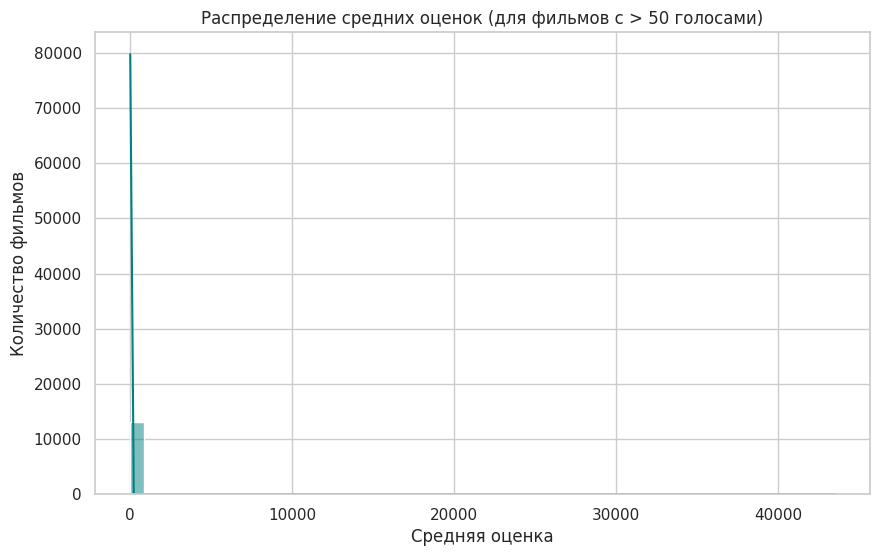

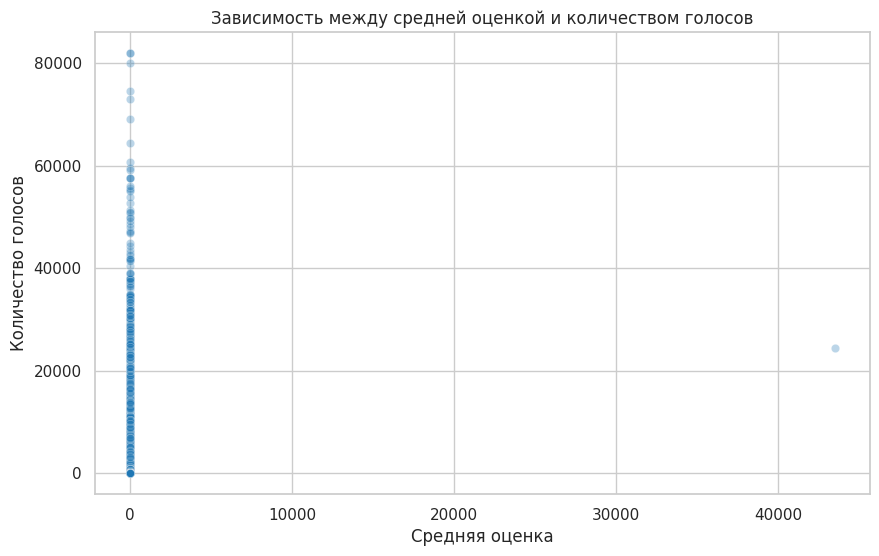

In [ ]:
# 1. Загрузка данных
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv', on_bad_lines='skip')

# 2. Объединение таблиц для удобства
# Сгруппируем рейтинги по movieId, посчитаем количество оценок (count) и среднюю (mean)
movie_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

# Присоединим названия фильмов и жанры
df = movies.merge(movie_stats, on='movieId', how='left')

# Заменим NaN на 0 (для фильмов без оценок)
df['count'] = df['count'].fillna(0)
df['mean'] = df['mean'].fillna(0)

print("Топ-5 фильмов по количеству оценок:")
display(df.sort_values(by='count', ascending=False).head())

# 3. Визуализация распределения оценок
plt.figure(figsize=(10,6))
sns.histplot(df[df['count'] > 50]['mean'], bins=50, kde=True, color='teal')
plt.title('Распределение средних оценок (для фильмов с > 50 голосами)')
plt.xlabel('Средняя оценка')
plt.ylabel('Количество фильмов')
plt.show()

# 4. Визуализация "Длинного хвоста" (Long Tail)
# Большинство фильмов имеют мало оценок, а популярные - очень много.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='mean', y='count', alpha=0.3)
plt.title('Зависимость между средней оценкой и количеством голосов')
plt.xlabel('Средняя оценка')
plt.ylabel('Количество голосов')
plt.show()

## Задание 3

Сделайте рекомендацию фильмов на основе контента:
1. Будем считать, что описание фильма состоит из его тегов.
2. Когда пользователь ставит оценку за фильм, ее нужно засчитать как оценку за теги.
3. Рекомендацией будем считать фильмы с тегами, которые пользователь оценил выше всего.



In [ ]:
# --- ПОДГОТОВКА ДАННЫХ (Сэмплирование) ---

# Оставим только популярные фильмы (более 1000 оценок), чтобы уменьшить размерность
popular_movies_ids = df[df['count'] > 1000]['movieId'].values
ratings_filtered = ratings[ratings['movieId'].isin(popular_movies_ids)]

# Ограничим количество пользователей (например, первые 5000 уникальных пользователей из отфильтрованного списка)
# Это нужно, чтобы Colab не вылетел из-за нехватки памяти
unique_users = ratings_filtered['userId'].unique()[:5000]
ratings_sample = ratings_filtered[ratings_filtered['userId'].isin(unique_users)]

print(f"Размер выборки: {ratings_sample.shape[0]} оценок")

# --- СОЗДАНИЕ МАТРИЦЫ ПРЕДПОЧТЕНИЙ ---
# Индекс - пользователь, Столбец - фильм, Значение - оценка
user_movie_matrix = ratings_sample.pivot_table(index='userId', columns='movieId', values='rating')

# Заполняем пропуски нулями (или можно средним, но для корреляции нули допустимы при разреженной матрице)
# Однако для корреляции Пирсона лучше оставить NaN, но pandas corr() умеет с ними работать,
# или использовать Centered Cosine Similarity. Для простоты здесь используем трансиозирование и corr.

print("Размерность матрицы (Users x Movies):", user_movie_matrix.shape)
display(user_movie_matrix.iloc[:5, :5]) # Показать кусочек матрицы

# --- ПОИСК ПОХОЖИХ ПОЛЬЗОВАТЕЛЕЙ ---

# Функция для поиска похожих пользователей и рекомендации
def get_recommendations(target_user_id, matrix, n_recommendations=5):
    if target_user_id not in matrix.index:
        return "Пользователь не найден в выборке."

    # Транспонируем, чтобы corr() считала корреляцию между строками (пользователями)
    # Внимание: Это ресурсоемкая операция. В реальных задачах используют NearestNeighbors из sklearn.
    # Здесь используем упрощенный подход: корреляция целевого юзера со всеми остальными.

    user_ratings = matrix.loc[target_user_id]
    similar_scores = matrix.corrwith(user_ratings, axis=1, method='pearson')

    # Сортируем пользователей по схожести (от самого похожего)
    similar_users = similar_scores.sort_values(ascending=False)

    # Убираем самого себя из топа (корреляция = 1.0)
    similar_users = similar_users.drop(target_user_id)

    # Берем топ-10 похожих пользователей
    top_similar_users = similar_users.head(10)

    # Собираем фильмы, которые смотрели эти похожие люди, но НЕ смотрел наш пользователь
    suggested_movies = []

    # Фильмы, которые уже видел целевой пользователь (чтобы не рекомендовать их снова)
    watched_movies = user_ratings[user_ratings.notna()].index

    for user in top_similar_users.index:
        # Оценки похожего пользователя
        sim_user_ratings = matrix.loc[user]
        # Фильмы с высокой оценкой (>= 4)
        top_movies = sim_user_ratings[sim_user_ratings >= 4].index

        for movie in top_movies:
            if movie not in watched_movies:
                suggested_movies.append(movie)

    # Считаем частоту встречаемости рекомендованных фильмов среди похожих юзеров
    from collections import Counter
    movie_counts = Counter(suggested_movies)

    # Топ N фильмов
    top_recs = movie_counts.most_common(n_recommendations)

    rec_ids = [m[0] for m in top_recs]

    # Возвращаем названия
    return movies[movies['movieId'].isin(rec_ids)][['title', 'genres']]

# --- ТЕСТИРОВАНИЕ ---
# Выберем случайного пользователя из нашей выборки
test_user = unique_users[10]
print(f"Рекомендации для пользователя ID {test_user}:")
recs = get_recommendations(test_user, user_movie_matrix)
display(recs)

Размер выборки: 758786 оценок
Размерность матрицы (Users x Movies): (5000, 3807)


movieId,1.0,2.0,3.0,4.0,5.0
userId,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN


Рекомендации для пользователя ID 11:


,title,genres
257,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
314,"Shawshank Redemption, The (1994)",Crime|Drama
2480,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4857,Ocean's Eleven (2001),Crime|Thriller
12221,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


# Порядок защиты работы

**Для защиты работы необходимо:**
1. Предоставить результаты выполнения 3 заданий в виде ссылки на Google Colab.
2. Выполнить дополнительное задание в процессе сдачи работы. Дополнительное задание представляет собой обработку данных лабораторной работы, по сложности аналогичную той, что требовалось выполнить в рамках работы.

**Примеры дополнительных заданий:**

1. Сделайте неперсонализированную рекомендацию фильма по имеющимся данным. Можно, например, найти фильм с самой высокой средней оценкой по каждому жанру или за какой-то период.
2. В текущем задании был реализован `user-based` подход. Перепишите код так, чтобы был реализован `item-based` подход.

In [ ]:
# Выполнение дополнительного задания №2

# --- ДОП. ЗАДАНИЕ 2: ITEM-BASED COLLABORATIVE FILTERING ---

# Используем ту же матрицу user_movie_matrix из Задания 3.
# Напоминание: user_movie_matrix - это pivot_table (строки=userId, столбцы=movieId).

def get_item_based_recommendations(movie_title, matrix, n_recommendations=5):
    # 1. Находим ID фильма по названию
    # (Ищем точное совпадение или первое частичное)
    try:
        # Пытаемся найти точное совпадение
        target_movie_id = movies[movies['title'] == movie_title]['movieId'].values[0]
    except IndexError:
        return f"Фильм '{movie_title}' не найден в базе данных movies."

    # 2. Проверяем, есть ли этот фильм в нашей матрице (попал ли он в выборку популярных)
    if target_movie_id not in matrix.columns:
        return "Этот фильм недостаточно популярен (нет в матрице выборки)."

    # 3. Получаем вектор оценок для выбранного фильма
    # Это колонка в нашей матрице: как все пользователи оценили этот конкретный фильм
    movie_ratings = matrix[target_movie_id]

    # 4. Считаем корреляцию этого фильма со ВСЕМИ остальными фильмами (столбцами)
    # В User-Based мы использовали axis=1 (строки), здесь используем axis=0 (столбцы, по умолчанию)
    # Это самая тяжелая операция.
    similar_scores = matrix.corrwith(movie_ratings)

    # 5. Очистка и сортировка результатов
    # Удаляем NaN (где не было пересечений пользователей)
    similar_scores = similar_scores.dropna()

    # Сортируем от 1.0 (полное совпадение) вниз
    similar_movies = similar_scores.sort_values(ascending=False)

    # Убираем сам фильм из рекомендаций (он всегда будет первым с корреляцией 1.0)
    if target_movie_id in similar_movies.index:
        similar_movies = similar_movies.drop(target_movie_id)

    # Берем топ-N
    top_movie_ids = similar_movies.head(n_recommendations).index

    # 6. Формируем красивый ответ с названиями
    result_df = movies[movies['movieId'].isin(top_movie_ids)].copy()

    # Добавляем колонку с коэффициентом схожести (корреляцией)
    result_df['similarity'] = result_df['movieId'].map(similar_movies)

    # Сортируем результат, чтобы порядок соответствовал корреляции
    result_df = result_df.sort_values(by='similarity', ascending=False)

    return result_df[['title', 'genres', 'similarity']]

# --- ТЕСТИРОВАНИЕ ---

target_movie = 'Star Wars: Episode IV - A New Hope (1977)'
print(f"Фильмы, похожие на '{target_movie}' (Item-Based):")

recs_item_based = get_item_based_recommendations(target_movie, user_movie_matrix)

if isinstance(recs_item_based, str):
    print(recs_item_based)
else:
    display(recs_item_based)

print("-" * 30)

target_movie_2 = 'Pulp Fiction (1994)'
print(f"Фильмы, похожие на '{target_movie_2}' (Item-Based):")
display(get_item_based_recommendations(target_movie_2, user_movie_matrix))

Фильмы, похожие на 'Star Wars: Episode IV - A New Hope (1977)' (Item-Based):


,title,genres,similarity
1166,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,0.791086
927,Giant (1956),Drama|Romance|Western,0.778165
5208,Enigma (2001),Romance|Thriller,0.758507
10203,Proof (2005),Drama,0.730748
1179,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,0.729826


------------------------------
Фильмы, похожие на 'Pulp Fiction (1994)' (Item-Based):


,title,genres,similarity
3074,Carnal Knowledge (1971),Comedy|Drama,0.753544
3330,Jungle Fever (1991),Drama|Romance,0.748923
40792,Central Intelligence (2016),Action|Comedy,0.718311
2091,Marnie (1964),Drama|Mystery|Romance|Thriller,0.705200
16514,Attack the Block (2011),Action|Comedy|Sci-Fi,0.690208


# Дополнительные материалы

1. Рекомендательные системы [Электронный ресурс]. URL: https://neerc.ifmo.ru/wiki/index.php?title=Рекомендательные_системы (дата обращения: 02.04.2024).
2. Surprise: A Python scikit for recommender systems [Электронный ресурс]. URL: https://surpriselib.com/ (дата обращения: 02.04.2024).
